In [22]:
#  definindo funções de matemática 

import numpy as np

def crossprod(A, B):
    C=np.zeros(3)
    C[0]=A[1]*B[2]-A[2]*B[1]
    C[1]=A[2]*B[0]-A[0]*B[2]
    C[2]=A[0]*B[1]-A[1]*B[0]
    return C 

def mod(F):
    mod=np.sqrt(F[0]*F[0]+F[1]*F[1]+F[2]*F[2])	
    return mod

# teste
A=np.array([1.0,2.0,3.0])
B=np.array([4.0,5.0,6.0])
C=crossprod(A,B)
print("Produto vetorial A x B = ",C)
print("Módulo do vetor C = ",mod(C))

Produto vetorial A x B =  [-3.  6. -3.]
Módulo do vetor C =  7.3484692283495345


In [23]:
# definindo funções de física
def FLorentz(q, v, B): # força de Lorentz
    F=np.zeros(3)
    F = q*crossprod(v, B)
    return F    

def Velocity(v0, a, t):
    v = np.zeros(3)
    vers = np.zeros(3) # versor na direção de v
    for i in range(3): 
        v[i] = v0[i] + a[i] * t

    modv = mod(v) # deve ser diferente de zero
    modv0 = mod(v0)
    for i in range(3):
        vers[i] = v[i] / modv
        v[i] = modv0 * vers[i] 
    return v

def Position(r0, v0, a, t):
    r = np.zeros(3)
    for i in range(3): 
        r[i]=r0[i]+v0[i]*t+(a[i]*t*t)/2
    return r    

def RelMass(m, v0): # massa relativística
    c = 299792458 # m/s
    beta = mod(v0) / c
    #print("beta = %.3e" % beta)
    mR = m / np.sqrt(1 - beta * beta)
    #print("mR = %.3e" % mR)
    return mR

def VariableB(B0, r): # campo magnético variável
    B0[0] = 0
    B0[1] = 1e-4 # Tesla 
    B0[2] = 0
    k = 1.1
    modr = mod(r)
    B = np.zeros(3)
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor inicial
    for i in range(3):
        B[i] = B0[i]
    if modr > 1:
        for i in range(3):
            B[i] = k * rL0 * B0[i] / modr
    return B

import numpy as np
def Bdipolar(r): # campo magnético dipolar

    # constantes
    mi0=np.pi*4E-7 # T.m/A
    m=8E22 # A.m^2, momento magnético da Terra
    mod_r = mod(r)
    cos_theta = r[2]/mod_r
    sen_theta = np.sqrt(1 - cos_theta*cos_theta)
    sen_phi=r[1]/np.sqrt(r[0]*r[0]+r[1]*r[1])
    cos_phi=r[0]/np.sqrt(r[0]*r[0]+r[1]*r[1])

    Br=(2*m*mi0*cos_theta)/(4*np.pi*mod_r*mod_r*mod_r)
    Btheta=(m*mi0*sen_theta)/(4*np.pi*mod_r*mod_r*mod_r)

    B = np.zeros(3)
    B[0]=(Br*sen_theta*cos_phi + Btheta*cos_theta*cos_phi)
    B[1]=(Br*sen_theta*sen_phi + Btheta*cos_theta*sen_phi)
    B[2]=(Br*cos_theta - Btheta*sen_theta)
    return B


# teste
q=15.0
v=np.array([0.0,1.0,0.0])
B=np.array([0.0,0.0,1.0])
F=FLorentz(q, v, B)
print("Força de Lorentz F = ",F)
r = np.array([1.0,0.0,0.0])
B = Bdipolar(r)
print("Campo magnético dipolar B = ",B)


Força de Lorentz F =  [15.  0.  0.]
Campo magnético dipolar B =  [ 0.e+00  0.e+00 -8.e+15]


In [ ]:
import pandas as pd

#constantes 
c = 299792458 # m/s
e = 1.6e-19 # C
mp = 1.67e-27 # kg
u = 1.66e-27 # kg



def main(q, m, r0, v0, B0):
        
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor
    T=2*np.pi*mR/(q*modB) # periodo de giro
    t=T/10000
    
    positions = []
    for i in range(30000):
        B=VariableB(B0,r0)
        modB=mod(B)
        rL=mR*modv/(q*modB)
        modr=mod(r0)
        #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        F=FLorentz(q,v0,B)
        modF=mod(F)
        a=np.zeros(3)
        for j in range(3):
            a[j]=F[j]/mR
        v=Velocity(v0,a,t)
        r=Position(r0,v0,a,t)
        x=r[0]
        y=r[1]
        z=r[2]
        positions.append([x, y, z])
        for j in range(3):
            r0[j]=r[j]
            v0[j]=v[j]
  

    df = pd.DataFrame(positions, columns=['x', 'y', 'z']) 

    return df  


def main_dipolar(q, m, r0, v0, B0):
        
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor
    T=2*np.pi*mR/(q*modB) # periodo de giro
    t=T/10000
    
    positions = []
    for i in range(30000):
        B=Bdipolar(r0)
        modB=mod(B)
        rL=mR*modv/(q*modB)
        modr=mod(r0)
        #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        F=FLorentz(q,v0,B)
        modF=mod(F)
        if i>29999: 
            print("Força de Lorentz F = ",F)
            print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        a=np.zeros(3)
        for j in range(3):
            a[j]=F[j]/mR
        v=Velocity(v0,a,t)
        r=Position(r0,v0,a,t)
        x=r[0]
        y=r[1]
        z=r[2]
        positions.append([x, y, z])
        for j in range(3):
            r0[j]=r[j]
            v0[j]=v[j]
  

    df = pd.DataFrame(positions, columns=['x', 'y', 'z']) 

    return df  


import matplotlib.pyplot as plt

def plot_trajectory(df, name):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(df['x'], df['y'], df['z'], 'purple')
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')
    ax.set_title(f'Gráfico da {name}')
    plt.show()



                  x             y             z
0         19.659731      2.808659      2.814836
1         37.767019      5.617318     16.448211
2         44.576853      7.516849     35.952265
3         42.923563      9.196394     56.233683
4         34.840940     10.766066     74.783239
...             ...           ...           ...
29995  20536.084947  11286.687098 -13368.587714
29996  20547.654060  11287.049211 -13352.206585
29997  20559.209773  11287.411324 -13335.815999
29998  20570.752078  11287.773437 -13319.415969
29999  20582.280968  11288.135550 -13303.006506

[30000 rows x 3 columns]


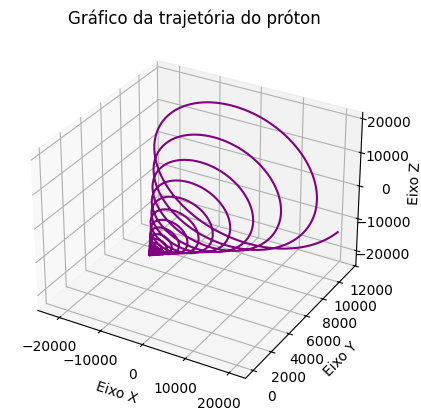

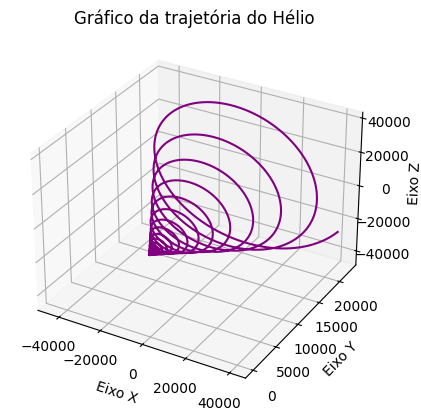

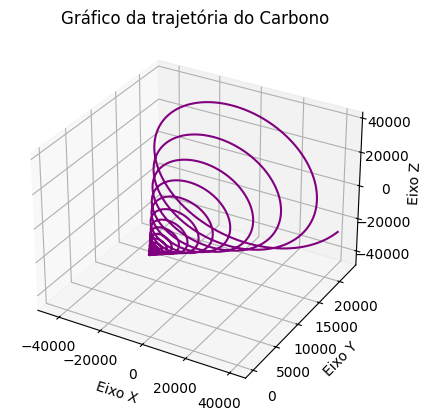

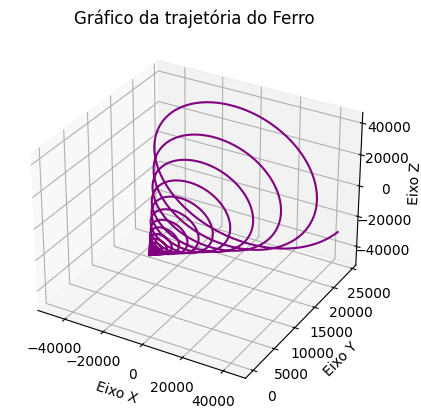

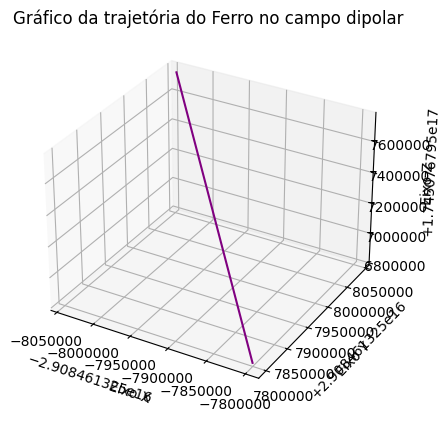

In [ ]:
#Rodando para o próton
q=1*e
m=mp
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_proton = main(q, m, r0, v0, B0)
print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton')

#Rodando para o He
q=2*e
m=4*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_helio = main(q, m, r0, v0, B0)
#print(df_helium)
plot_trajectory(df_helio, 'trajetória do Hélio')

#Rodando para o C
q=6*e
m=12*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_carbono = main(q, m, r0, v0, B0)
#print(df_carbono)
plot_trajectory(df_carbono, 'trajetória do Carbono')

#Rodando para o Fe
q=26*e
m=56*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_ferro = main(q, m, r0, v0, B0)
#print(df_ferro)
plot_trajectory(df_ferro, 'trajetória do Ferro')

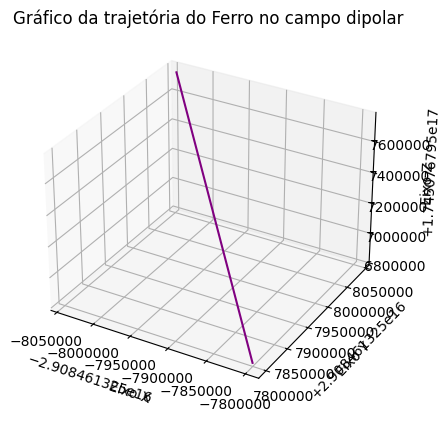

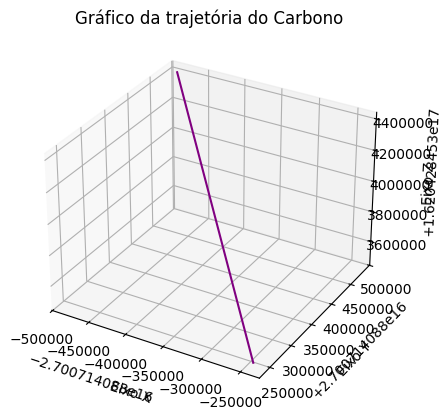

In [27]:
#Rodando para o Fe com campo dipolar
q=26*e
m=56*u
r0=[1.0,1.0,1.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_ferro_dip = main_dipolar(q, m, r0, v0, B0)
#print(df_ferro)
plot_trajectory(df_ferro_dip, 'trajetória do Ferro no campo dipolar')

# rodando para o C com campo dipolar
q=6*e
m=12*u
r0=[1.0,1.0,1.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_carbono_dip = main_dipolar(q, m, r0, v0, B0)
#print(df_carbono)
plot_trajectory(df_carbono_dip, 'trajetória do Carbono')

In [29]:
import os
os.startfile("C:/root/bin/root.exe")
